# Background

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

# Objective

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

# Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

In [1]:
# install the scipy version 1.6.1. and restart the kernel after the successful installation
!pip install scipy==1.6.1

In [2]:
# import the scipy and check the version to be sure that the version is 1.6.1.
import scipy
scipy.__version__

'1.6.1'

In [3]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [4]:
ab= pd.read_csv('abtest.csv') #importing the dataset

In [5]:
ab.head() #printing the first five rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


There are 5 variables here. This dataset is showing us the difference between an old landing page and a new landing page. Half of the users get the old landing page and the other half use the new landing page. This dataset allows us to observe the differene in the time they spent on the page, whether or not the user converted, and what language they preferred. 

In [6]:
ab.shape #code to get the shape of the dataset

(100, 6)

There are 100 rows and 6 columns

In [7]:
ab.describe() #this code shows us the summary statistics of this dataset

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


The mean time spent on the page for all users in the dataset was 5.37 minutes, the median was 5.41, and the standard deviation was 2.38

In [8]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'group', 'landing_page', 'converted', 'language_preferred' into categorical variables

# use info() to print a concise summary of the DataFrame
ab.info()
for col in ['group', 'landing_page', 'converted','language_preferred']:
    ab[col]=ab[col].astype('category') #this code changed the type from object to catergory
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-n

There is no missing data. 

The memory usage dropped 

We also changed the object variables into category variables so that we can perform EDA 

# Univariate Analysis

In [9]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="blue"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

5.377800000000002

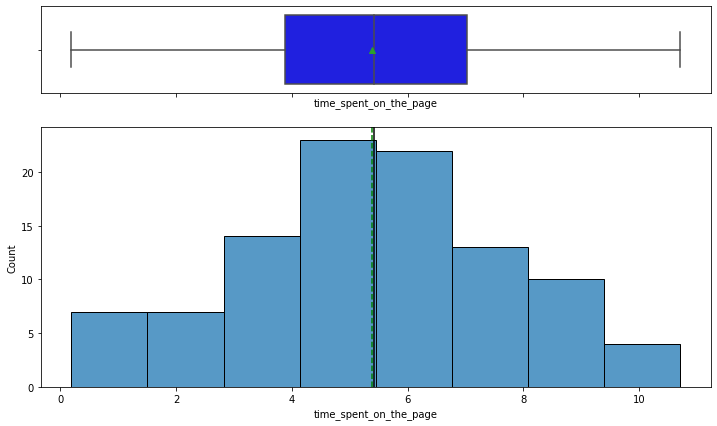

In [10]:
histogram_boxplot(ab, 'time_spent_on_the_page') #this code outputs a boxplot and histogram
plt.savefig("output.jpg", bbox_inches='tight')
ab['time_spent_on_the_page'].mean()

The mean time spent on the page for all users is 5.37 minutes
The histogram follows a normal distributions the mean and medium are even really close in value

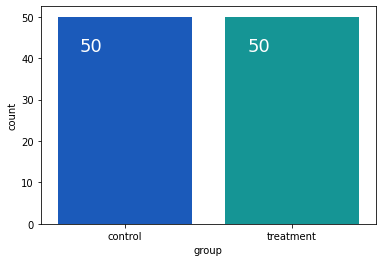

In [11]:
ax=sns.countplot(x=ab['group'],palette='winter', data=ab); #this code outputs a countplot of the group feature
plt.savefig("output.jpg", bbox_inches='tight')
for p in ax.patches: #these lines of code adds the count label
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)


As expected there are 50 users in the control group and 50 users in the treatment group

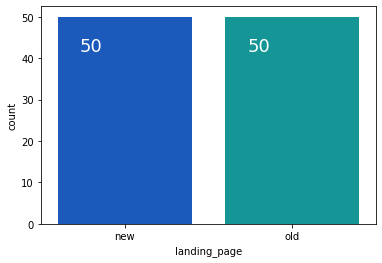

In [12]:
ax=sns.countplot(x=ab['landing_page'],palette='winter', data=ab); #this code outputs a countplot the landing page feature
plt.savefig("output.jpg", bbox_inches='tight')
for p in ax.patches: #this code outputs the count labels
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

Becasue the control group is the old landing page and the treatment group is the new landing page we can also see here that there are 50 users in each catergory

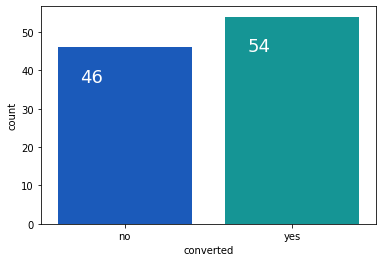

In [13]:
ax=sns.countplot(x=ab['converted'],palette='winter', data=ab); #this code outputs a countplot of the converted feature
plt.savefig("output.jpg", bbox_inches='tight')
for p in ax.patches: #this code outputs a count label
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

In the dataset there were 54 users who converted to subscribers and 46 who did not. This is before splitting the data by which landing page they used

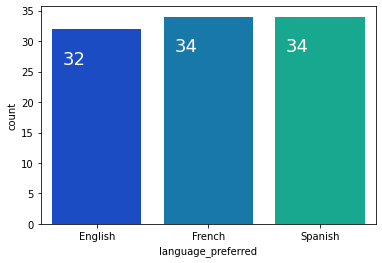

In [14]:
ax=sns.countplot(x=ab['language_preferred'],palette='winter', data=ab); #this code outputs a countplot language preferred feature
plt.savefig("output.jpg", bbox_inches='tight')
for p in ax.patches: #this code outputs a count label
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

32 users preferred English

34 users preferred French

34 users preferred Spanish

There is a good mix of users here

# Mulitvariate Analysis

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


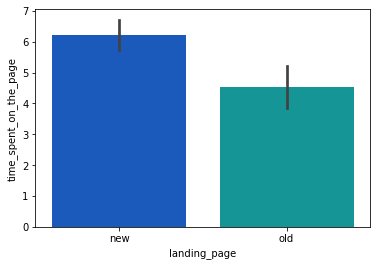

In [15]:
sns.barplot(x='landing_page', y='time_spent_on_the_page', data=ab, palette='winter') #this code outputs a barplot of the time spent on the page vs the landing page that was used
plt.savefig("output.jpg", bbox_inches='tight')
plt.figure(figsize=(12,12)) #this code groups the data by landing page and then outputs the mean time spent on the page

Here we can see the differecne in the time spent on the landing page. We can observe that the users spend who were on the new landing page spent more time on the page than the users who used the old landing page 

Is the new landing page better and more desirable?

,time_spent_on_the_page
converted,
no,3.915870
yes,6.623148


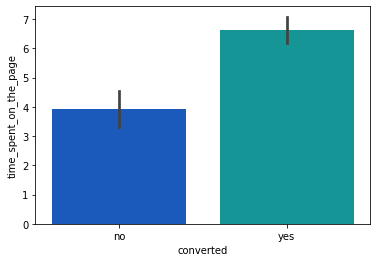

In [16]:
sns.barplot(x='converted', y='time_spent_on_the_page', data=ab, palette='winter') #this code outputs a barplot of the time spent on the page vs converted status
plt.savefig("output.jpg", bbox_inches='tight')
ab.groupby('converted')[['time_spent_on_the_page']].mean() #this code groups the data by converted than output the mean time on the page of those who converted and those who did not

Here we can see the differecne in the time spent on the page from those who converted to subscribers vs those who did not. We can observe that the users spend who converted spent more time on the page than those who did not convert

,time_spent_on_the_page
language_preferred,
English,5.559063
French,5.253235
Spanish,5.331765


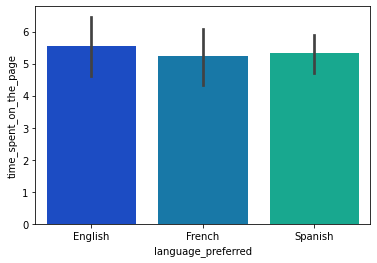

In [17]:
sns.barplot(x='language_preferred', y='time_spent_on_the_page', data=ab, palette='winter') #this code outputs a barplot of time spent on the page vs language preferred
plt.savefig("output.jpg", bbox_inches='tight')
ab.groupby('language_preferred')[['time_spent_on_the_page']].mean() #this code groups the data by language preferred and outputs the mean time spent on the page for each language

Here we can see if the time spent on the page was different among the different language the users preferred. It is not to differnt but what we can observe is that those who prefer English spend just a little more time on the page than those who preferred French and Spanish

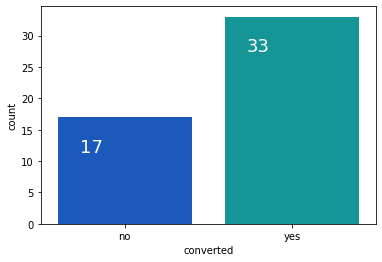

In [18]:
ab2=ab[ab['landing_page']=="new"] #this code isolates the landing page feature by new this allows us to analyze only the observations on the new landing page
ab2['converted'].value_counts() #we get the value counts of those who converted or did not
ax=sns.countplot(x=ab2['converted'],palette='winter', data=ab); #creates a countplot 
plt.savefig("output.jpg", bbox_inches='tight')
for p in ax.patches: #labes the countplot
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

Here we can see that 33 users out of 50 who used the new landing page converted to subscribers 

More than half of the users on the new landing page converted

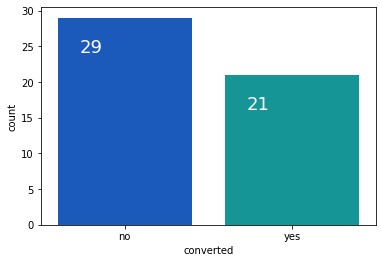

In [19]:
ab3=ab[ab['landing_page']=='old'] #this code isolates the landing page feature by old landing page and allows us to analyze only the observations on the old landing page
ab3['converted'].value_counts() #this outputs a count of those who converted or did not convert
ax=sns.countplot(x=ab3['converted'],palette='winter', data=ab); #creates a countplot
plt.savefig("output.jpg", bbox_inches='tight')
for p in ax.patches: #labels the countplot
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

Here we can see that only 21 users out of 50 who used the old landing page converted to subscribers

The conversion on the new landing page is better than the old landing page here less than half converted

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


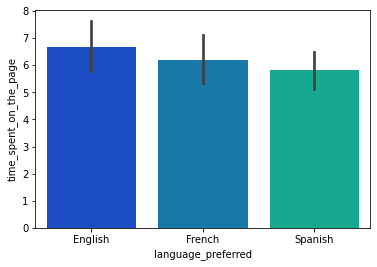

In [20]:
ab4=ab[ab['landing_page']=="new"] #this code isolates the landing page feature by new this allows us to analyze only the observations on the new landing page
ab4.groupby('language_preferred')[['time_spent_on_the_page']].mean() #this code groups the data by language preferred and then outputs the mean time spent on the page
sns.barplot(x='language_preferred', y='time_spent_on_the_page', data=ab4, palette='winter') #this outputs a barplot
plt.savefig("output.jpg", bbox_inches='tight')
ab4.groupby('language_preferred')[['time_spent_on_the_page']].mean() #this code groups the data by language preferred and then outputs the mean time spent on the page

This chart shows us the relationship between wich language users preferred and how much time they spent on the page. This is only for the users on the new landing page however it is similar to what we saw when we looked at all users regardless of what page they used

,time_spent_on_the_page
language_preferred,
English,4.454375
French,4.310000
Spanish,4.828235


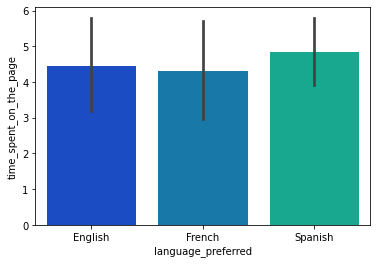

In [21]:
ab5=ab[ab['landing_page']=="old"] #this code isolates the landing page feature by old landing page and allows us to analyze only the observations on the old landing page
sns.barplot(x='language_preferred', y='time_spent_on_the_page', data=ab5, palette='winter') #this code ouptuts a barplot
plt.savefig("output.jpg", bbox_inches='tight')
ab5.groupby('language_preferred')[['time_spent_on_the_page']].mean() #this code groups the data by language preferred and outputs the mean time spent on the page

This chart shows us the relationship between wich language users preferred and how much time they spent on the page. This is only for the users on the old landing page the results here are slighly different as now those who preferred Spanish spent more time on the page

# Do the users spend more time on the new landing page than the old landing page?

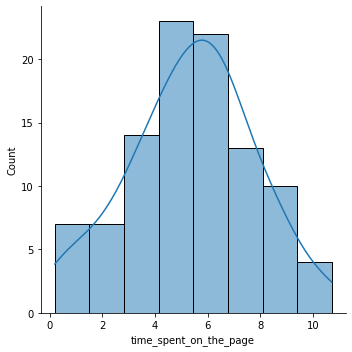

In [22]:
# Density plot of time spent on the page
sns.displot(ab["time_spent_on_the_page"], kde=True)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

The time spent on the page variable follows a normal distribution

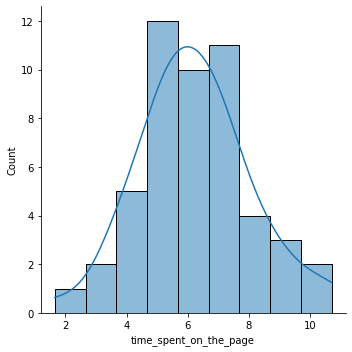

In [23]:
sns.displot(ab2["time_spent_on_the_page"], kde=True) #density plot of time spent on the page only for those on the new page
plt.show()

The time spent on the page variable (for those using the new page) follows a normal distribution

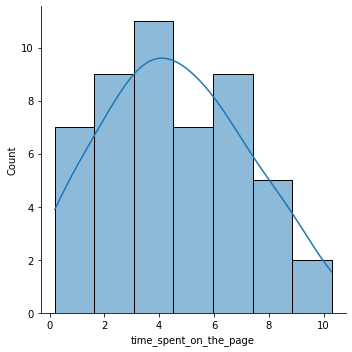

In [24]:
sns.displot(ab3["time_spent_on_the_page"], kde=True) #density plot of time spent on the page only for those on the old landing page
plt.show()

The time spent on the page variable (for those using the old page) roughly follows a normal distribution

# Two Independent Sample T-test for Equality of Means - Unequal Std Dev

### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the daily mean for time spent on the new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

In [25]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on new landing page is ' + str(ab2['time_spent_on_the_page'].mean()))
print('The mean time spent on old landing page is ' + str(ab3['time_spent_on_the_page'].mean()))
print('The standard deviation of time spent on new landing page is  ' + str(round(ab2['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of mean time spent on old landing page is ' + str(round(ab3['time_spent_on_the_page'].std(), 2)))

The mean time spent on new landing page is 6.2232
The mean time spent on old landing page is 4.532400000000001
The standard deviation of time spent on new landing page is  1.82
The standard deviation of mean time spent on old landing page is 2.58


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time is measured on a continuous scale.
* Normally distributed populations - Yes, we can see from the denstity plots that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

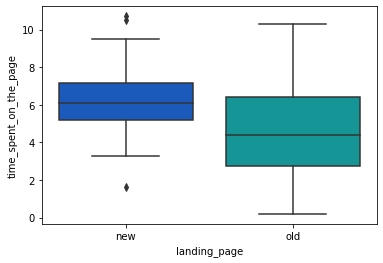

In [26]:
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=ab, palette='winter') #outputs a boxplot of the mean time spent on the page for the landing page being used
plt.savefig("output.jpg", bbox_inches='tight')

From the boxplot above we can assume that users do spend more time on the new landing page than the old landing page but it is important that we test this hypothesis so that we be accurate in our assumption

In [27]:
from scipy.stats import ttest_ind
# prepare the data
time_spent_on_new_landingpage=ab[ab.landing_page=='new']['time_spent_on_the_page']
time_spent_on_old_landingpage=ab[ab.landing_page=='old']['time_spent_on_the_page']
# find the p-value
test_stat, p_value = ttest_ind(time_spent_on_new_landingpage, time_spent_on_old_landingpage, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Insight
As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend more time on the new landing page than the old landing page.

# Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

# Two Proportion Z-test

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who visit the new landing page and get converted and those who visit the old landing page and get converted  respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, the user either converted or did not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{17} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{29} =29 \geq 10 $

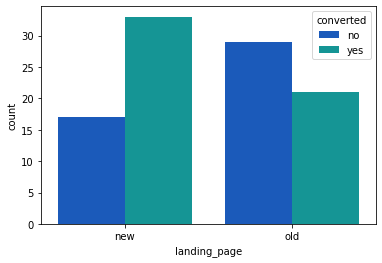

In [28]:
sns.countplot(x='landing_page',hue='converted',palette='winter', data=ab) #this outputs a countplot of the converted status and which landing page was used
plt.savefig("output.jpg", bbox_inches='tight')

From the countplot above we can observe that those on the new landing page were more likely to convert to a subscriber than those users who were on the old landing page. Again it is important to test this hyptothesis so that we can be sure

In [29]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of conversions
defect_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Insight

As the p-value is less than the significance level 0.05, we can reject the null hypothesis. Hence, we do have enough evidence to conclude that the conversion rate of the new landing page is greater than the conversion rate of the old landing page.

# Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

# Chi-Square Test for Independence

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Converted status is independent of the preferred language.

against the alternate hypothesis

>$H_a:$ Converted status depends on the preferred language.

In [30]:
cont_table= pd.crosstab(ab['language_preferred'],ab['converted']) #extracts the necessary data to figure out how many converted depending on the language preferred
cont_table.head()

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


For users who preferred English 21 converted and 11 did not

For users who preferred French 15 converted and 19 did not

For users who preferred Spanish 18 converted and 16 did not

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

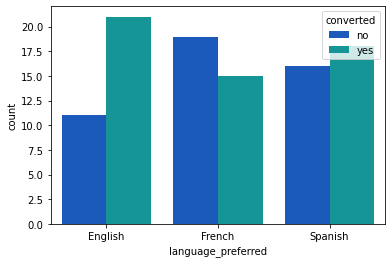

In [31]:
sns.countplot(x='language_preferred',hue='converted',palette='winter', data=ab) #this code outputs a countplot of those who converted or did not based off the language they preferred
plt.savefig("output.jpg", bbox_inches='tight')

From the countplot above it does not look as though the language users prefer makes a any difference if they convert to subscirbers or not, in that case we can assume that these two things are independent of each other, let us test it to be sure

In [32]:
#import the required functions
from scipy.stats import chi2_contingency
#preparing the contingency table
chi, p_value, dof, expected = chi2_contingency(cont_table)
print('The p-value is ', p_value)

The p-value is  0.2129888748754345


### Insight
As the p-value is greater than the significance level, we fail reject the null hypothesis. Hence, we do not have enough evidence to conclude that converted status is not independent of the preferred language at 5% significance level.

# Is the mean time spent on the new page same for the different language users?

# One-way ANOVA Test

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the page for languages preferred Egnlish, French and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time spent on the page mean is different from the rest.

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


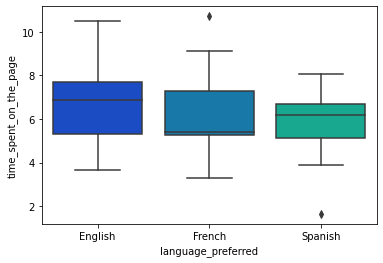

In [33]:
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=ab2, palette='winter')#outputs a boxplot of the mean time spent on the page for the landing page being used
plt.savefig("output.jpg", bbox_inches='tight')
ab2.groupby('language_preferred')[['time_spent_on_the_page']].mean() #this code groups the data by language preferred and outputs the mean time spent on the page based on preferred language

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [34]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(ab2['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [35]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( ab2['time_spent_on_the_page'][ab2['language_preferred']=="English"], 
                                   ab2['time_spent_on_the_page'][ab2['language_preferred']=="French"], 
                                   ab2['time_spent_on_the_page'][ab2['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [36]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(ab2.loc[ab2['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              ab2.loc[ab2['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              ab2.loc[ab2['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is much greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough evidence to conclude that at least one time spent on the page mean is different from the rest at 5% significance level.

In [37]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = ab2['time_spent_on_the_page'], groups = ab2['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


### Insight

As the p-values (refer to the p-adj column) for comparing the mean time_spent_on_the_page for all pairs is greater than the significance level, the null hypothesis of equality of all population means cannot be rejected.

# Conclusions and Recommendations

### Conclusion

After all the analysis we can conclude that:

1. The mean time spent on the page for all users was 5.37 minutes


2. From the hypothesis test we can conclude that users did spend more time on the new page than the old page


3. We can also conclude that the new page had a greater conversion rate than the old landing page


4. The language preferred by the user did not really have an impact on whether the user converted to a subscriber or not since the two variables are independent of each other


5. The mean time spent on the new landing page did not differ based on the user's preferred language 


### Recommendations

Based on our analysis the following recommendations can help E-News Express better gain new subscribers:

1. Not only is the mean time spent on the page for the new landing page greater than the old landing page, but it also has a higher conversion rate. Because of this, it is important that E-News Express implement this new landing page as soon as possible as it is the most effective page at gaining new subscribers


2. Because the language preferred by the users does not even have an impact on the conversion rate or the mean time spent on the page, then E-News express does not have to prioritize or cater to any specific language rather than just allow users to choose their preferred language like they already do


3. All time and investments should be put into the new landing page as it gives E-News Express the best chance to succeed and gain new subscribers
